# Live Cattle, Feeder Cattle, Corn Futures

In [1]:
import pandas as pd
import src

import warnings
warnings.filterwarnings('ignore')

/Users/ericostring/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


- Start off with live cattle futures

In [2]:
live_cattle_futures = pd.read_csv('csv/live_cattle_futures.csv')
live_cattle_futures.head()

,time,open,high,low,close
0,193933800,39.00,39.05,37.90,38.10
1,194020200,38.05,38.45,38.02,38.40
2,194106600,38.50,38.57,37.82,38.42
3,194193000,38.60,38.70,38.10,38.17
4,194279400,38.00,38.15,37.40,37.45


In [3]:
live_cattle_futures = src.clean_tv_data(live_cattle_futures)

<AxesSubplot:title={'center':'Live Cattle Futures ($/cwt)'}>

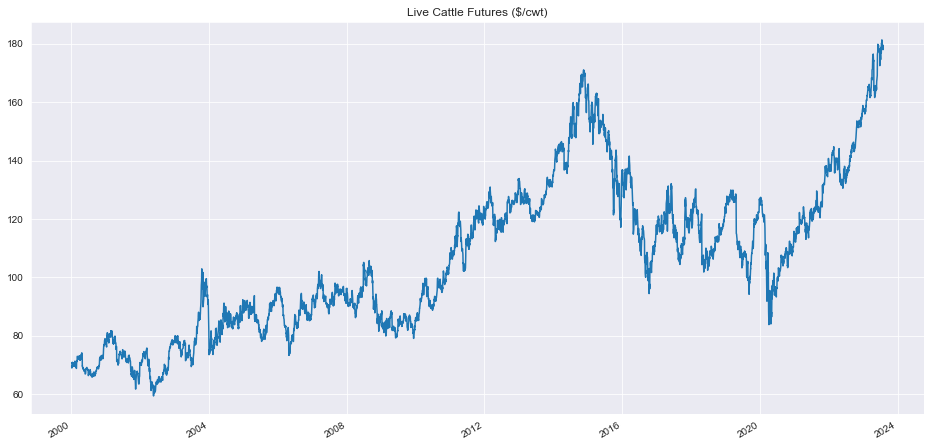

In [4]:
live_cattle_futures.plot(title='Live Cattle Futures ($/cwt)')

<AxesSubplot:title={'center':'Adj. Live Cattle Futures (adj.$/cwt)'}>

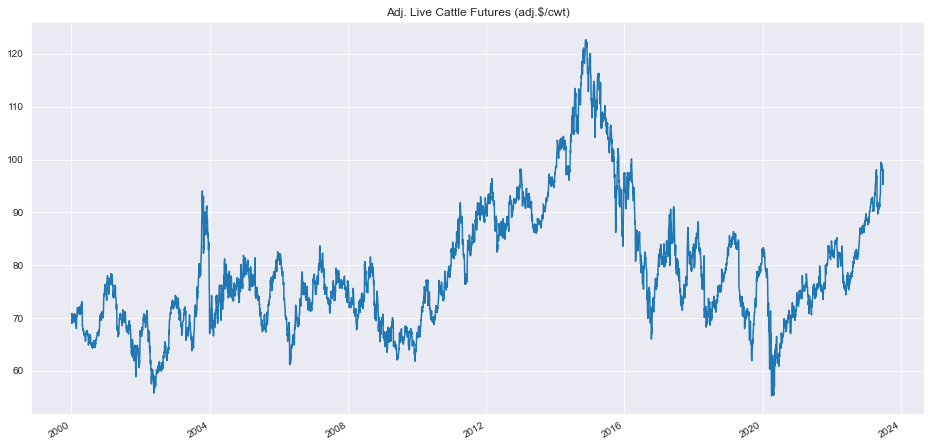

In [5]:
adj_live_cattle_futures = src.adjust_series_cpi(live_cattle_futures)
adj_live_cattle_futures.plot(title='Adj. Live Cattle Futures (adj.$/cwt)')

- Note drastic difference between nominal and inflation adjusted prices

#### Check out feeder cattle futures

In [6]:
feeder_cattle_futures = pd.read_csv('csv/feeder_cattle_futures.csv')
feeder_cattle_futures = src.clean_tv_data(feeder_cattle_futures)
feeder_cattle_futures.head()

2000-01-03    85.87
2000-01-04    85.77
2000-01-05    85.72
2000-01-06    86.37
2000-01-07    86.87
Name: close, dtype: float64

<AxesSubplot:title={'center':'Feeder Cattle Futures ($/cwt)'}>

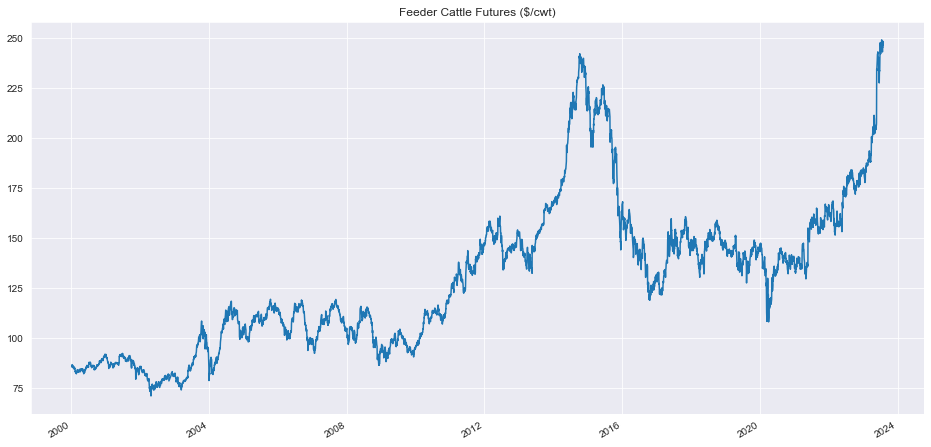

In [7]:
feeder_cattle_futures.plot(title='Feeder Cattle Futures ($/cwt)')

<AxesSubplot:>

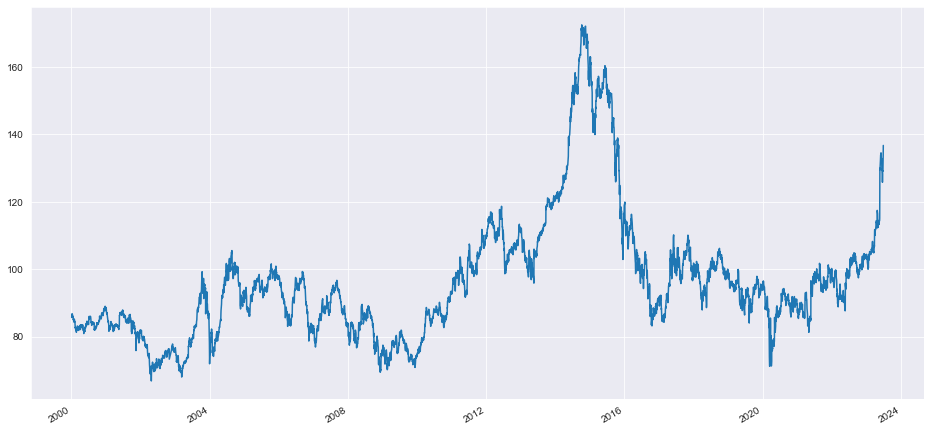

In [8]:
adj_feeder_cattle_futures = src.adjust_series_cpi(feeder_cattle_futures)
adj_feeder_cattle_futures.plot()

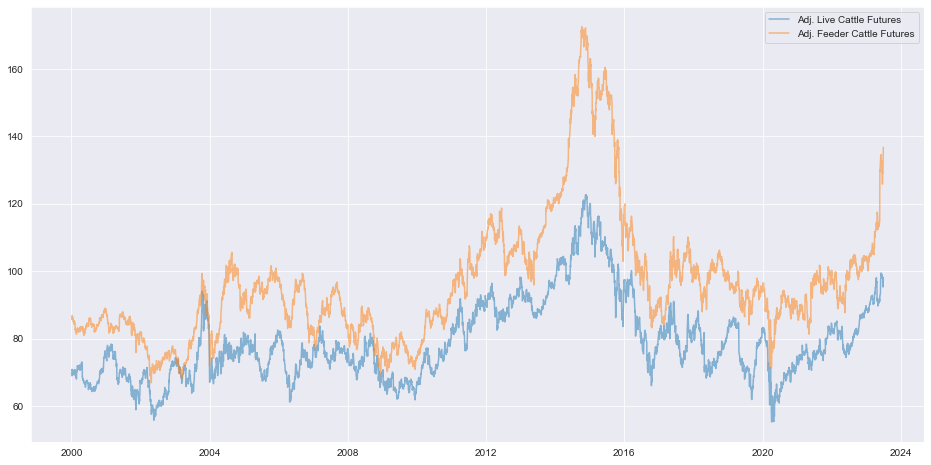

In [9]:
src.lineplot_mult_same_axis(
    adj_live_cattle_futures,
    adj_feeder_cattle_futures,
    'Adj. Live Cattle Futures',
    'Adj. Feeder Cattle Futures'
)

- Feeder cattle inflation adjusted prices are consistently higher than live cattle's per cwt in past +20 years (as expected)

<AxesSubplot:title={'center':'Adjusted Feeder Cattle Futures - Adjusted Live Cattle Futures ($/cwt)'}>

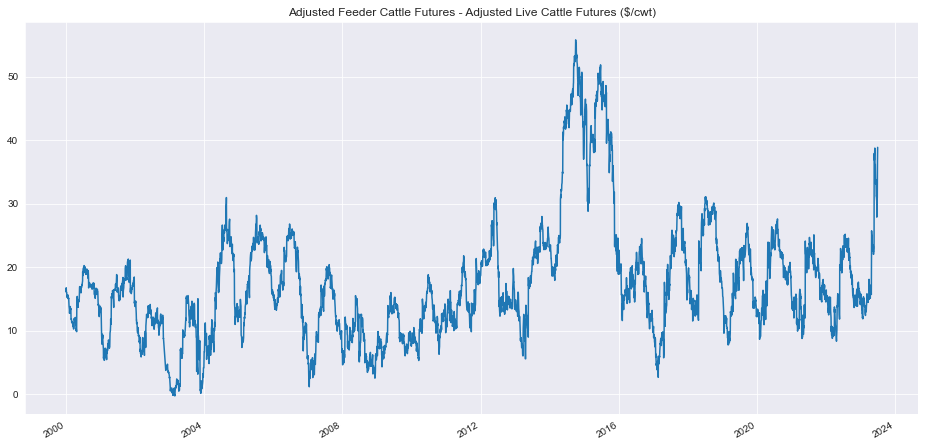

In [10]:
adj_diff = (adj_feeder_cattle_futures - adj_live_cattle_futures).dropna()
adj_diff.plot(title='Adjusted Feeder Cattle Futures - Adjusted Live Cattle Futures ($/cwt)')

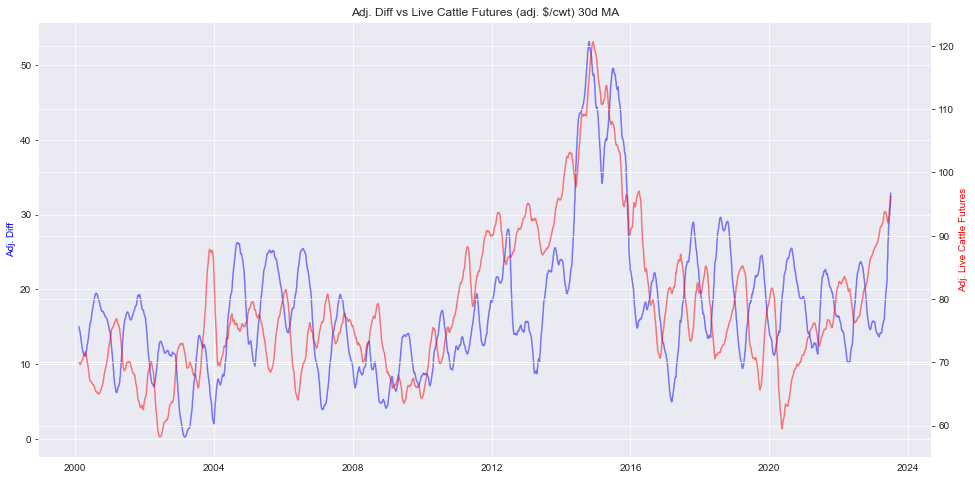

In [11]:
src.lineplot_2_own_axis(
    adj_diff.rolling(30).mean(),
    adj_live_cattle_futures.rolling(30).mean(),
    'Adj. Diff',
    'Adj. Live Cattle Futures',
    'Adj. Diff vs Live Cattle Futures (adj. $/cwt) 30d MA'
    )

In [12]:
adj_diff.corr(adj_live_cattle_futures)

0.549404811937829

- adjusted difference seems to jump whenever the cattle pricse (for both) is high
- i.e. when cattle is expensive, feeder cattle is proportionately more expensive than live cattle

- calculate the diff as the % difference between the adjusted feeder cattle futures price and adjusted live cattle futures price

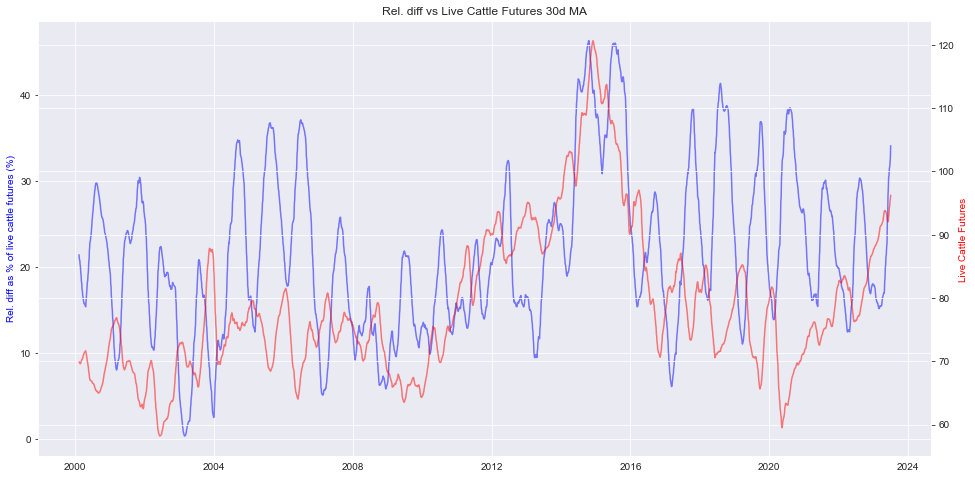

In [13]:
diff_as_pct = (( (adj_feeder_cattle_futures - adj_live_cattle_futures) / adj_live_cattle_futures)*100).dropna()

src.lineplot_2_own_axis(
    diff_as_pct.rolling(30).mean(),
    adj_live_cattle_futures.rolling(30).mean(),
    'Rel. diff as % of live cattle futures (%)',
    'Live Cattle Futures ',
    'Rel. diff vs Live Cattle Futures 30d MA'
    )

In [14]:
diff_as_pct.corr(adj_live_cattle_futures)

0.22026949817260202

- High price for live cattle --> more money available proportionally to bid up feeder cattle (assuming other input costs such as corn/grain stay same)

#### Corn Futures

In [15]:
corn_futures = pd.read_csv('csv/corn_futures.csv')
corn_futures = src.clean_tv_data(corn_futures)
corn_futures.head()

2000-01-03    200.75
2000-01-04    203.00
2000-01-05    203.25
2000-01-06    204.00
2000-01-07    207.00
Name: close, dtype: float64

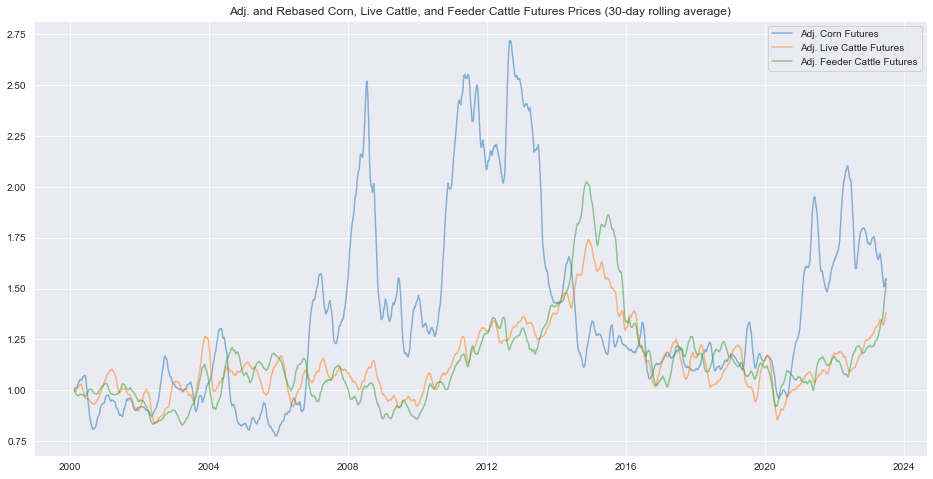

In [28]:
src.lineplot_mult_normalized(
    src.adjust_series_cpi(corn_futures.rolling(30).mean()),
    src.adjust_series_cpi(live_cattle_futures.rolling(30).mean()),
    src.adjust_series_cpi(feeder_cattle_futures.rolling(30).mean()),    
    'Adj. Corn Futures',
    'Adj. Live Cattle Futures',
    'Adj. Feeder Cattle Futures',
    title="Adj. and Rebased Corn, Live Cattle, and Feeder Cattle Futures Prices (30-day rolling average)",
    )

- Seems like whenever corn price crashes, cattle prices rally
- Would expect when corn prices crash, feeder cattle would rally, as feedlots have more budget available to bid up the other major production input: feeder cattle
- Notice period ~2015 when corn futures price crashed, whilst live and feeder cattle futures started to rally
- The ~2015 corn price crash demostrates this:
    - Live cattle was increasing
    - Feedlot producers had more available budget to bid up costs
    - Corn price had crashed
    - Therefore this budget was directed towards feeder cattle
    - Caused feeder cattle to rally more relative to live cattle

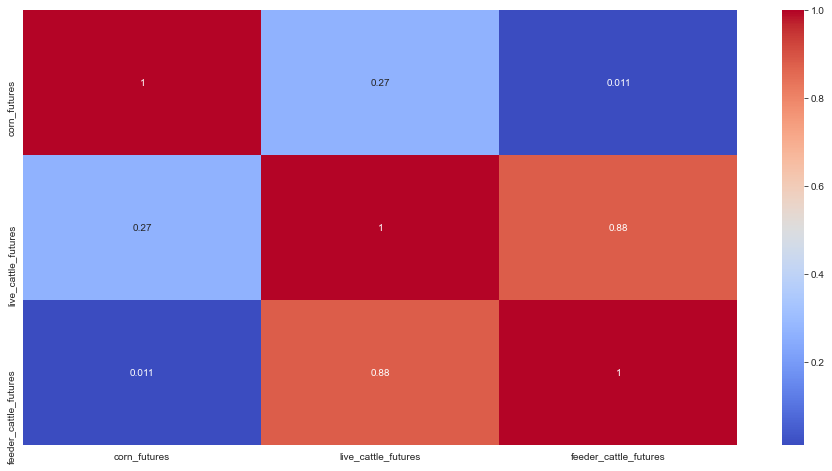

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.concat([
    src.adjust_series_cpi(corn_futures).resample('Y').mean().pct_change(),
    src.adjust_series_cpi(live_cattle_futures).resample('Y').mean().pct_change(),
    src.adjust_series_cpi(feeder_cattle_futures).resample('Y').mean().pct_change()
    ], axis=1)

df.columns = ['corn_futures', 'live_cattle_futures', 'feeder_cattle_futures']

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

No handles with labels found to put in legend.


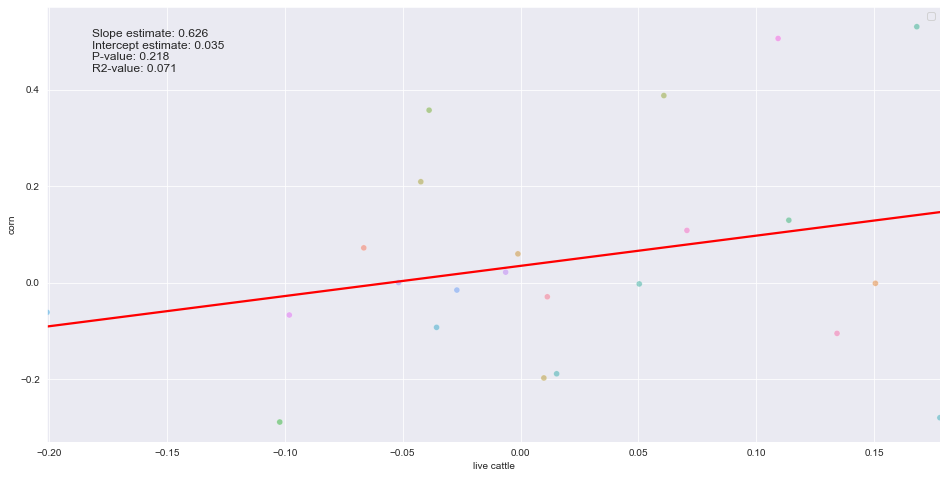

In [37]:
src.scatterplot(
    src.adjust_series_cpi(live_cattle_futures).resample('Y').mean().pct_change(),
    src.adjust_series_cpi(corn_futures).resample('Y').mean().pct_change(),
    'live cattle',
    'corn',
    reg=True
)

No handles with labels found to put in legend.


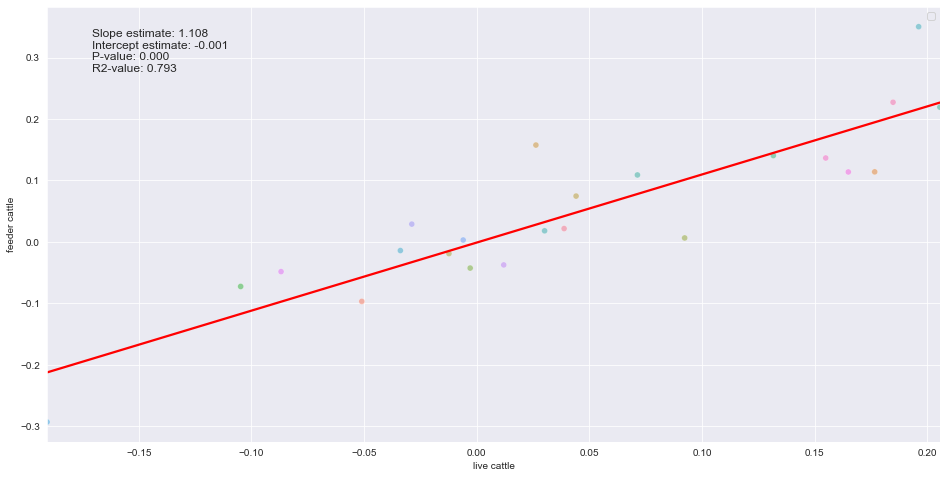

In [55]:
src.scatterplot(
    live_cattle_futures.resample('Y').mean().pct_change(),
    feeder_cattle_futures.resample('Y').mean().pct_change(),
    'live cattle',
    'feeder cattle',
    reg=True
)

In [46]:
import statsmodels.api as sm

df = pd.concat([
    
    
    src.adjust_series_cpi(live_cattle_futures).resample('Y').mean().pct_change(),
    src.adjust_series_cpi(feeder_cattle_futures).resample('Y').mean().pct_change(),
    src.adjust_series_cpi(corn_futures).resample('Y').mean().pct_change()

    ],
    keys=['Adj. annual % ∆ Live Cattle', 'Adj. annual % ∆ Feeder Cattle', 'Adj. annual % ∆ Corn'],
    axis=1)

df = df.dropna()


model = sm.OLS(df.iloc[:,0], df.iloc[:,1:]).fit()

print(model.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Adj. annual % ∆ Live Cattle   R-squared (uncentered):                   0.848
Model:                                     OLS   Adj. R-squared (uncentered):              0.833
Method:                          Least Squares   F-statistic:                              58.48
Date:                         Tue, 29 Aug 2023   Prob (F-statistic):                    2.61e-09
Time:                                 21:41:47   Log-Likelihood:                          43.022
No. Observations:                           23   AIC:                                     -82.04
Df Residuals:                               21   BIC:                                     -79.77
Df Model:                                    2                                                  
Covariance Type:                     nonrobust                                                  
                              